Load the Trained spaCy Model

In [15]:
import spacy

# Load the trained model
nlp = spacy.load("event_date_time_model_with_alignment")
nlp1 = spacy.load("en_core_web_sm")
# print(nlp)

Extract Vectors

In [26]:
import pandas as pd

# Load dataset
data = pd.read_csv('event_data.csv')
# Extract vectors for the sentences
sentences = [f"{row['Verb']} an event on {row['Date']} at {row['Time']} in {row['Country']}" for _, row in data.iterrows()]
# Process sentences to get vectors
vectors = [nlp1(sentence).vector for sentence in sentences]
# Check the shape of one vector
print(vectors[0].shape)
# print(data)
# print(sentences)
# print(vectors[:2])


(96,)


Dimensionality Reduction

In [21]:
# import numpy as np
# from sklearn.decomposition import PCA
# vectors = [nlp(sentence).vector for sentence in sentences]
# # Convert list to numpy array
# data = np.array(vectors)
# # Check the shape of the data
# print("Data shape before PCA:", data.shape)
# # Ensure data is not empty and has features
# if data.shape[1] == 0:
#     raise ValueError("Data has no features. Check the preprocessing steps.")
# # Apply PCA
# pca = PCA(n_components=2)
# reduced_data = pca.fit_transform(data)
# # Check the shape of the reduced data
# print("Reduced data shape:", reduced_data.shape)

In [29]:
from sklearn.decomposition import PCA
import numpy as np
# Convert list to numpy array
# data = np.array(vectors)
# # Check the shape of the data
# print("Data shape before PCA:", data.shape)
# # Ensure data is not empty and has features
# if data.shape[1] == 0:
#     raise ValueError("Data has no features. Check the preprocessing steps.")
# # Perform PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
# Check the shape of the reduced vectors
print(reduced_vectors.shape)


(1000, 2)


Plot Vectors with Matplotlib

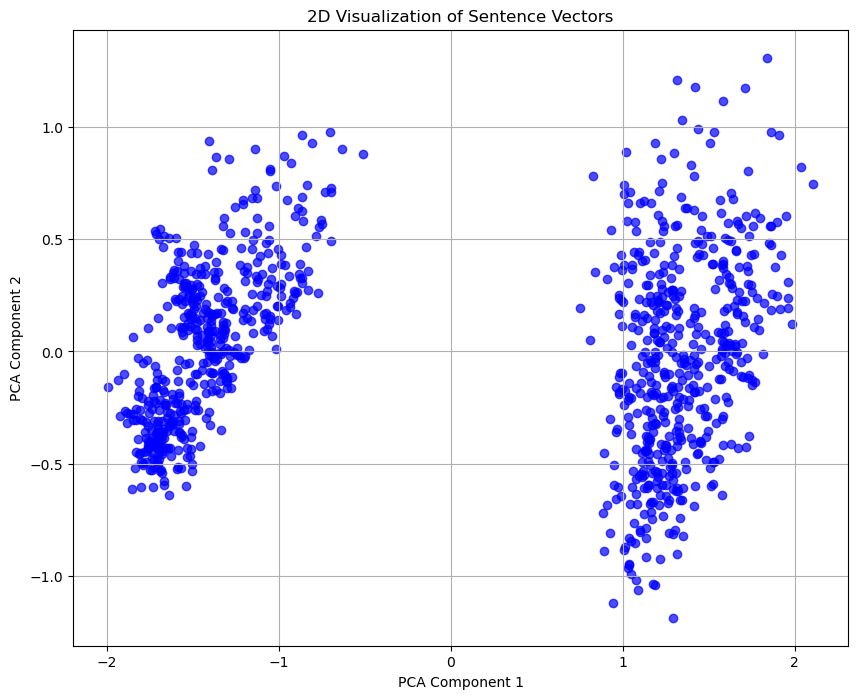

In [30]:
import matplotlib.pyplot as plt

# Plot the reduced vectors
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7, c='blue')
plt.title('2D Visualization of Sentence Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
